## Ensemble learning

- A group of models working together to outperform a single model. Simple like human-based decision systems where many opinions are consulted before taking a decision



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder #For encoding the categorical variables down

In [3]:
df = pd.read_csv("Marketing Camp.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age (numeric)

job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')

marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

default: has credit in default? (categorical: 'no','yes','unknown')

balance: average yearly balance, in euros (numeric)

housing: has housing loan? (categorical: 'no','yes','unknown')

loan: has personal loan? (categorical: 'no','yes','unknown')

contact: contact communication type (categorical:'cellular','telephone')

day: last contact day of the month (numeric 1 -31)

month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')

duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')

target: has the client subscribed a term deposit? (binary:"yes","no")


#### For the sake of learning and implementing Ensemble only numerical variables such as age,  balance is taken into account for predicting whether they signed for the campaign or not

In [8]:
dataset = df[['age', 'balance', 'Target']]
dataset

,age,balance,Target
0,58,2143,no
1,44,29,no
2,33,2,no
3,47,1506,no
4,33,1,no
...,...,...,...
45206,51,825,yes
45207,71,1729,yes
45208,72,5715,yes
45209,57,668,no


In [9]:
le = LabelEncoder()

dataset['Target_Labels'] = le.fit_transform(dataset['Target'])
dataset

C:\Users\rohit\AppData\Local\Temp\ipykernel_16848\106387429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Target_Labels'] = le.fit_transform(dataset['Target'])


,age,balance,Target,Target_Labels
0,58,2143,no,0
1,44,29,no,0
2,33,2,no,0
3,47,1506,no,0
4,33,1,no,0
...,...,...,...,...
45206,51,825,yes,1
45207,71,1729,yes,1
45208,72,5715,yes,1
45209,57,668,no,0


In [10]:
dataset['Target_Labels'].value_counts(normalize=True)

Target_Labels
0    0.883015
1    0.116985
Name: proportion, dtype: float64

In [11]:
list(le.inverse_transform(dataset.Target_Labels.tail()))  #checking if the target labels actuall map 


['yes', 'yes', 'yes', 'no', 'no']

In [12]:
model_dataset = dataset[['age','balance','Target_Labels']]

X = model_dataset[['age','balance']]
y = dataset.Target_Labels

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42, stratify= y
)


#### Random Forest - Each tree predicts, and for classfication algorithm - the major vote wins and for regression - the avg of all 

Random forest reducest the variance

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)

train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 0.954
Test Accuracy: 0.825


### XGBoost 

In [15]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()
ratio

7.548333727251241

In [16]:
# Configure XGBoost
xgb_classifier = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)

# Train with early stopping
xgb_classifier.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)
train_accuracy = xgb_classifier.score(X_train, y_train)
test_accuracy = xgb_classifier.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 0.650
Test Accuracy: 0.656


In [17]:
from sklearn.metrics import classification_report, roc_auc_score, recall_score

rf_preds = rf.predict(X_test)
xgb_preds = xgb_classifier.predict(X_test)

print("RF ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("XGB ROC-AUC:", roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1]))

print(classification_report(y_test, xgb_preds))


RF ROC-AUC: 0.6243988906420711
XGB ROC-AUC: 0.6403307004035214
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      7985
           1       0.18      0.53      0.26      1058

    accuracy                           0.66      9043
   macro avg       0.55      0.60      0.52      9043
weighted avg       0.83      0.66      0.72      9043



In [21]:
probs = xgb_classifier.predict_proba(X_test)[:,1]
probs

array([0.42605275, 0.42183563, 0.47256777, ..., 0.53249085, 0.43172684,
       0.4435537 ], dtype=float32)

In [22]:
for t in [0.3, 0.4, 0.5, 0.6]:
    preds = (probs >= t).astype(int)
    print(t, recall_score(y_test, preds))


0.3 0.9763705103969754
0.4 0.8402646502835539
0.5 0.5302457466918714
0.6 0.20793950850661624


If learning_rate = 0.1
Each tree makes a large correction.

If learning_rate = 0.01
Each tree makes a tiny correction.

In [20]:
dataset

,age,balance,Target,Target_Labels
0,58,2143,no,0
1,44,29,no,0
2,33,2,no,0
3,47,1506,no,0
4,33,1,no,0
...,...,...,...,...
45206,51,825,yes,1
45207,71,1729,yes,1
45208,72,5715,yes,1
45209,57,668,no,0


C:\Users\rohit\AppData\Local\Temp\ipykernel_16848\743689617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reg.drop_duplicates(inplace = True)


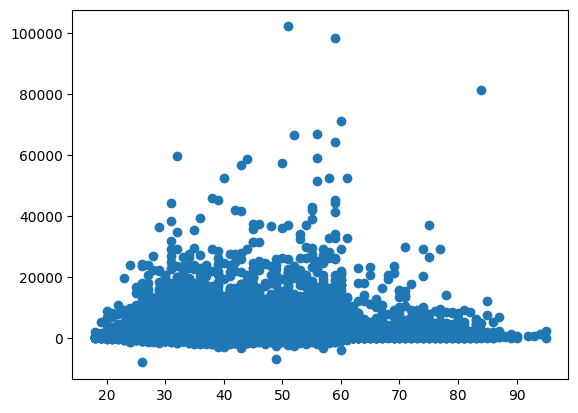

In [25]:
dataset_reg = dataset[['age', 'balance']]
dataset_reg.drop_duplicates(inplace = True)
plt.scatter(dataset_reg['age'], dataset_reg['balance'])